## Data Understanding and Modeling Python Notebook.



First thing we will do is to load and explore the data.
<br> - The data is loaded from SQLite.

In [9]:
# Read data from sqllite database which has all the csv files dumped earlier.
import sqlite3
import pandas as pd
import numpy as np
conn = sqlite3.connect("C:\Users\Amandeep\pluralsight.db")

user_assessment_scores = pd.read_sql_query("select * from user_assessment_scores;", conn)
user_course_views = pd.read_sql_query("select * from user_course_views;", conn)
course_tags = pd.read_sql_query("select * from course_tags;", conn)
user_interests = pd.read_sql_query("select * from user_interests;", conn)

# Close connection of sqlite. Always remember to close the connection!
conn.close()

Let's view how the data looks like. Normally the data has problems either on it's head or tail! We will see the 4 head and 4 tail rows of each table.

In [10]:
from IPython.display import display, HTML

print("User Assessments : Dims = " + str(user_assessment_scores.shape))
display(user_assessment_scores.head(4))
display(user_assessment_scores.tail(4))

print("\nUser Course Views : Dims = " + str(user_course_views.shape))
display(user_course_views.head(4))
display(user_course_views.tail(4))

print("\nCourse Tags : Dims = " + str(course_tags.shape))
display(course_tags.head(4))
display(course_tags.tail(4))

print("\nUser Interests : Dims = " + str(user_interests.shape))
display(user_interests.head(4))
display(user_interests.tail(4))

User Assessments : Dims = (6571, 4)


,user_handle,assessment_tag,user_assessment_date,user_assessment_score
0,7487,angular-js,2017-08-11 19:03:38,134
1,7487,css,2017-08-11 20:09:56,38
2,7487,html5,2017-07-31 18:59:37,84
3,7487,java,2017-07-31 18:49:27,149


,user_handle,assessment_tag,user_assessment_date,user_assessment_score
6567,8887,angular-js,2016-09-30 22:30:48,221
6568,8887,docker,2017-03-24 17:55:06,148
6569,8887,html5,2017-02-10 16:38:53,241
6570,4440,c-sharp,2017-09-04 15:58:48,126



User Course Views : Dims = (249238, 6)


,user_handle,view_date,course_id,author_handle,level,view_time_seconds
0,1,2017-06-27,cpt-sp2010-web-designers-branding-intro,875,Beginner,3786
1,1,2017-06-28,cpt-sp2010-web-designers-branding-intro,875,Beginner,1098
2,1,2017-06-28,cpt-sp2010-web-designers-css,875,Intermediate,4406
3,1,2017-07-27,cpt-sp2010-web-designers-css,875,Intermediate,553


,user_handle,view_date,course_id,author_handle,level,view_time_seconds
249234,9999,2017-10-14,python-getting-started,104,Beginner,1612
249235,10000,2017-08-18,apex-absolute-beginner-guide-coding-salesforce,229,Beginner,402
249236,10000,2017-08-21,apex-absolute-beginner-guide-coding-salesforce,229,Beginner,9500
249237,10000,2017-08-21,apex-fundamental-coding,229,Beginner,1659



Course Tags : Dims = (11337, 2)


,course_id,course_tags
0,12-principles-animation-toon-boom-harmony-1475,2d-animation
1,2d-racing-game-series-unity-5-1312,game-design
2,2d-racing-games-unity-volume-2-1286,game-art
3,2d-racing-games-unity-volume-2-1286,digital-painting


,course_id,course_tags
11333,z-os-mainframe-introduction,mainframe
11334,z-os-tso-ispf-environment-introduction,mainframe
11335,zsphere-modeling-zbrush-3505,3d-modeling
11336,zsphere-modeling-zbrush-3505,3d-sculpting



User Interests : Dims = (297526, 3)


,user_handle,interest_tag,date_followed
0,1,mvc-scaffolding,2017-06-27 16:26:52
1,1,mvc2,2017-06-27 16:26:52
2,1,mvc-html-helpers,2017-06-27 16:26:52
3,1,mvc4-ioc,2017-06-27 16:26:52


,user_handle,interest_tag,date_followed
297522,10000,salesforce,2017-08-14 14:56:57
297523,10000,sql,2017-08-14 14:56:57
297524,10000,java,2017-08-14 14:56:57
297525,10000,c#,2017-08-14 14:56:57


Lets see if we have any missing values in the data.

In [11]:
print(user_assessment_scores.isna().sum() + user_assessment_scores.isnull().sum())
print(user_course_views.isnull().sum() + user_course_views.isna().sum())
print(course_tags.isnull().sum() + course_tags.isna().sum())
print(user_interests.isnull().sum() + user_interests.isna().sum())

user_handle              0
assessment_tag           0
user_assessment_date     0
user_assessment_score    0
dtype: int64
user_handle          0
view_date            0
course_id            0
author_handle        0
level                0
view_time_seconds    0
dtype: int64
course_id      0
course_tags    0
dtype: int64
user_handle      0
interest_tag     0
date_followed    0
dtype: int64


Great, There are no missing values. Next step will be checking the datatypes and casting to correct datatypes if we need to. 

In [12]:
# Lets update the datatypes.
print("**Before = \n" + str(user_assessment_scores.dtypes))
user_assessment_scores['user_assessment_score'] = pd.to_numeric(user_assessment_scores['user_assessment_score'])
user_assessment_scores['user_assessment_date'] = pd.to_datetime(user_assessment_scores['user_assessment_score'])
print("**After = \n" + str(user_assessment_scores.dtypes))

print("\n**Before = \n" + str(user_course_views.dtypes))
user_course_views['view_time_seconds'] = pd.to_numeric(user_course_views['view_time_seconds'])
user_course_views['view_date'] = pd.to_datetime(user_course_views['view_date'])
print("**After = \n" + str(user_course_views.dtypes))

print("\n**Before = \n" + str(user_interests.dtypes))
user_interests['date_followed'] = pd.to_datetime(user_interests['date_followed'])
print("**After = \n" + str(user_interests.dtypes))

**Before = 
user_handle              object
assessment_tag           object
user_assessment_date     object
user_assessment_score    object
dtype: object
**After = 
user_handle                      object
assessment_tag                   object
user_assessment_date     datetime64[ns]
user_assessment_score             int64
dtype: object

**Before = 
user_handle          object
view_date            object
course_id            object
author_handle        object
level                object
view_time_seconds    object
dtype: object
**After = 
user_handle                  object
view_date            datetime64[ns]
course_id                    object
author_handle                object
level                        object
view_time_seconds             int64
dtype: object

**Before = 
user_handle      object
interest_tag     object
date_followed    object
dtype: object
**After = 
user_handle              object
interest_tag             object
date_followed    datetime64[ns]
dtype: object


The data looks pretty much clean! *I am happy!* :) <br>
There is no missing data, hence we don't have to deal with any missing data cases for now.
<br>- Lets get rid of duplicate rows from the data. <br>- Next lets see if when we have all the data for users in interest and course view table

In [13]:
# We have some rows which are duplicate. Lets get rid of those rows, 
# so that we can train our model only once on one training set.

if(user_assessment_scores.drop_duplicates().shape[0] != user_assessment_scores.shape[0]):
    user_assessment_scores = user_assessment_scores.drop_duplicates()
    print("Duplicates in user assessment scores df removed")
    
if(user_course_views.drop_duplicates().shape[0] != user_course_views.shape[0]):
    user_course_views = user_course_views.drop_duplicates()
    print("Duplicates in user course views df removed")

if(course_tags.drop_duplicates().shape[0] != course_tags.shape[0]):
    course_tags = course_tags.drop_duplicates()
    print("Duplicates in course tags df removed")

if(user_interests.drop_duplicates().shape[0] != user_interests.shape[0]):
    user_interests = user_interests.drop_duplicates()
    print("Duplicates in user interest df removed")

Duplicates in user interest df removed


Next let us collect all user ids. We will use this all users df to find users who have missing interests, course views, or assessments!<br> Similarly, we will also find the courses with missing tags but has user course view!

In [14]:
unique_users_in_assessment = user_assessment_scores['user_handle'].drop_duplicates()
unique_users_in_course_view = user_course_views['user_handle'].drop_duplicates()
unique_users_interests = user_interests['user_handle'].drop_duplicates()

unique_users = pd.concat([unique_users_in_assessment, unique_users_interests, unique_users_in_course_view]).drop_duplicates()
print(unique_users.head())
print(unique_users.shape[0])

0    7487
6    7407
7    3600
8    8152
9    3637
Name: user_handle, dtype: object
10000


In [15]:
unique_courses_in_course_view = user_course_views['course_id'].drop_duplicates()
unique_courses_in_course_tags = course_tags['course_id'].drop_duplicates()
unique_courses = pd.concat([unique_courses_in_course_view, unique_courses_in_course_tags]).drop_duplicates()
print(unique_courses.head())
print(unique_courses.shape[0])

0           cpt-sp2010-web-designers-branding-intro
2                      cpt-sp2010-web-designers-css
4    aws-certified-solutions-architect-professional
5              aws-certified-sysops-admin-associate
6                     aws-system-admin-fundamentals
Name: course_id, dtype: object
5942


We have found that there are 10000 users and 5942 courses in the system. Lets also grab unique course tags, interest tags, and assessment tags.

In [16]:
unqiue_course_tags = course_tags['course_tags'].drop_duplicates()
print(unqiue_course_tags.head())
print(unqiue_course_tags.shape[0])

unqiue_assessment_tags = user_assessment_scores['assessment_tag'].drop_duplicates()
print(unqiue_assessment_tags.head())
print(unqiue_assessment_tags.shape[0])

unique_interest_tags = user_interests['interest_tag'].drop_duplicates()
print(unique_interest_tags.head())
print(unique_interest_tags.shape[0])

all_tags = pd.concat([unqiue_course_tags, unqiue_assessment_tags, unique_interest_tags]).drop_duplicates()
print("Total number of tags : " + str(all_tags.shape[0]))

0        2d-animation
1         game-design
2            game-art
3    digital-painting
4       image-editing
Name: course_tags, dtype: object
999
0    angular-js
1           css
2         html5
3          java
4    javascript
Name: assessment_tag, dtype: object
54
0     mvc-scaffolding
1                mvc2
2    mvc-html-helpers
3            mvc4-ioc
4         mvc-testing
Name: interest_tag, dtype: object
748
Total number of tags : 1191


Results show that we have 999 unique course tags, 54 assessment tags, and 748 interest tags! The total tags are 1191 which means we have some tags common.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['patch.force_edgecolor']=True
user_assessment_scores.dtypes

user_handle                      object
assessment_tag                   object
user_assessment_date     datetime64[ns]
user_assessment_score             int64
dtype: object

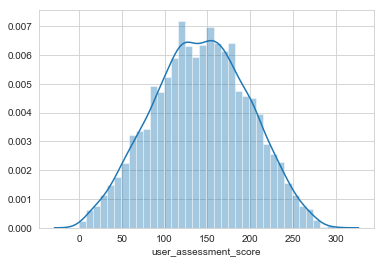

In [316]:
# Plot the assessment scores
sns.distplot(user_assessment_scores['user_assessment_score'])

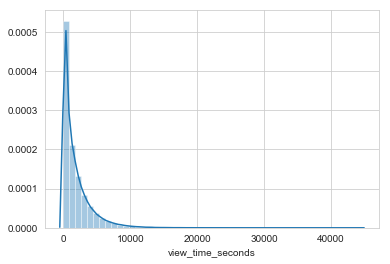

In [18]:
# Plot the view times
sns.distplot(user_course_views['view_time_seconds'])

# The view times are not normally distributed!

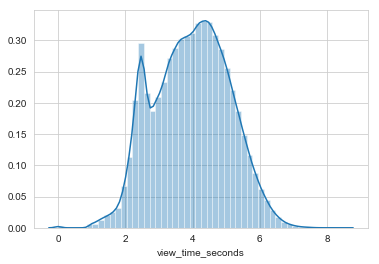

In [19]:
sns.distplot((user_course_views['view_time_seconds'])**0.2)
# let us try to normalzie the 'view_time_seconds' by transforming. 
# the normalization will not affect KNN but help in SVD method that is used later.
user_course_views['view_time_seconds'] = user_course_views['view_time_seconds'] ** 0.2

#### Let's start to create some similarity measure and evalute KNN
We will start by creating similarity for users based on their assessments.
We will create a class that takes in the dataframe, value columns, and index column to return top users based on SVD, Cosine, and Pearson similarity.

We will be using 10 fold cross validation for finding optmial KNN algorithm

In [29]:
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import Reader 
from surprise import accuracy
from surprise.model_selection import cross_validate

def findOptimalKNNAlgorithm(dataframe, user_column, item_column, score_column):
    """This method takes in a dataframe and the columns of user, item, and score. 
        This method will optimize for different KNN algorithms by using 10 fold CV and prints the results."""
    
    reader = Reader(rating_scale=(dataframe[score_column].min(), dataframe[score_column].max()))
    data = Dataset.load_from_df(dataframe[[user_column, item_column, score_column]], reader)
    
    benchmark = []
    
    # we use pearson baseline beacuse unlike other meausures it does not consider only common values.
    # https://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline
    sim_options = {'name': 'pearson_baseline'}
    
    # We are only using KNN algorithm here because similarity measure and getting neighbors is used by only these algorithms
    algorithms = [KNNBaseline(sim_options = sim_options), KNNBasic(sim_options = sim_options), 
                  KNNWithMeans(), KNNWithZScore()]
    for algorithm in algorithms:
        # Perform cross validation. Number of folds = 10. We are using RMSE as performance measure
        results = cross_validate(algorithm, data, measures=['RMSE'], cv = 10, verbose=False)

        # Get results & append algorithm name
        tmp = pd.DataFrame.from_dict(results).mean(axis=0)
        tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
        benchmark.append(tmp)
    print(pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse'))

We will find optimal values for each of the similarities we are finding.

In [30]:
findOptimalKNNAlgorithm(user_assessment_scores, 'user_handle', 'assessment_tag', 'user_assessment_score')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [31]:
cleaned_user_interest_df = user_interests[['user_handle', 'interest_tag']].drop_duplicates()
cleaned_user_interest_df['interest_val'] = 1

findOptimalKNNAlgorithm(cleaned_user_interest_df, 'user_handle', 'interest_tag', 'interest_val')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


C:\Python27\lib\site-packages\surprise\prediction_algorithms\algo_base.py:293: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

C:\Python27\lib\site-packages\surprise\prediction_algorithms\knns.py:404: RuntimeWarning: invalid value encountered in double_scalars
  sum_ratings += sim * (r - self.means[nb]) / self.sigmas[nb]


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
               fit_time  test_rmse  test_time
Algorithm                                    
KNNBaseline     76.7762        0.0    20.6096
KNNBasic        75.5486        0.0    19.9080
KNNWithMeans    15.0814        0.0    20.5070
KNNWithZScore   16.3232        0.0    24.9208


The below cell takes time to run. Upto 20 Mins.

In [312]:
user_courses_merge = pd.merge(left = user_course_views, right = course_tags, on = ['course_id'])
grouped_users_course_tags = user_courses_merge[['user_handle', 'course_tags', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_tags'])
meaned_group_user_courses_tag = grouped_users_course_tags.agg('mean').reset_index()
findOptimalKNNAlgorithm(meaned_group_user_courses_tag, 'user_handle', 'course_tags', 'view_time_seconds')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

The below cell takes time to run. Upto 20 Mins.

In [213]:
grouped_users_courses = user_course_views[['user_handle', 'course_id', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_id'])
meaned_group_users_courses = grouped_users_courses.agg('mean').reset_index()
findOptimalKNNAlgorithm(meaned_group_users_courses, 'user_handle', 'course_id', 'view_time_seconds')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

KNNBaseline algorithm is best suited for all the similarities. We will use KNNBaseline and it's neighbors to get the smilar users in our data. Next let us try to optimize for the value of 'K' for our SVD similarity. The bigger values of K will result to slower predictions whereas small 'K' value will result to faster but less accurate predictions. We already have RMSE for each of the similarities we will try to optmise closer to those.

In [35]:
from sklearn.metrics import mean_squared_error

def find_optimize_value_of_k_SVD(dataframe, index_column, columns_column, values_column):
    """Optmizes the dataframe for a value of K which is the number of dimensions that will 
    explain most of the features without any loss"""
    scores_matrix = dataframe.pivot(index = index_column, columns = columns_column, values = values_column)
    scores_matrix = scores_matrix.fillna(0)
    index_values = scores_matrix.index.values
    # we need reindexed to calclulate the cosine similarities
    reindexed_scores_matrix = scores_matrix.copy()
    reindexed_scores_matrix.index = range(0, index_values.shape[0])

    scores_mean = np.asarray([(np.mean(reindexed_scores_matrix, 1))]).T
    normalised_mat = reindexed_scores_matrix - scores_mean
    A = normalised_mat.T #/ np.sqrt(self.__reindexed_scores_matrix.shape[0] - 1)

    # Using svd
    U, S, V = np.linalg.svd(A, full_matrices = False)

    dim_size = 1
    k_vs_rmse = []
    
    # lets set max dim size to check for optmization.
    max_dim_size = min(scores_mean.shape[0], 800)
    for dim_size in range(1, max_dim_size, 2):
        # re_create and check MSE to see if it worked!
        S_k = np.diag(S[:dim_size])
        U_k = U[:, :dim_size]
        V_k = V[:dim_size, ]
        A_k = np.dot(np.dot(U_k, S_k), V_k) + scores_mean.T
        rmse = np.sqrt(mean_squared_error(A, A_k))
        k_vs_rmse.append([dim_size, rmse])
    scores_df = pd.DataFrame(k_vs_rmse, columns = ['K', 'RMSE'])

    return scores_df


def get_knee_point(scores_df):
    """Returns a knee point"""
    from kneed import KneeLocator
    kn = KneeLocator(scores_df.iloc[:, 0], scores_df.iloc[:, 1], curve='convex', direction='decreasing')
    return kn.knee

In [40]:
scores_df_ua = find_optimize_value_of_k_SVD(user_assessment_scores, 'user_handle', 
                                            'assessment_tag', 'user_assessment_score')

47


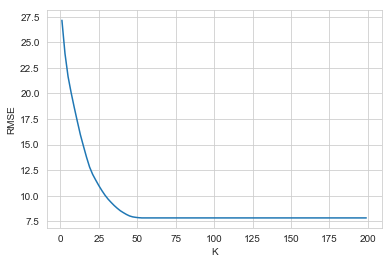

In [41]:
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df_ua[:100])
OPTIMIZED_DIM_SIZE_USER_ASSESSMENT = get_knee_point(scores_df_ua)
print(OPTIMIZED_DIM_SIZE_USER_ASSESSMENT)

In [42]:
scores_df_ui = find_optimize_value_of_k_SVD(cleaned_user_interest_df, 'user_handle', 'interest_tag', 'interest_val')

191


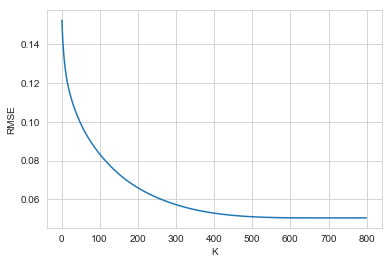

In [44]:
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df_ui)
OPTIMIZED_DIM_SIZE_USER_INTEREST = get_knee_point(scores_df_ui)
print(OPTIMIZED_DIM_SIZE_USER_INTEREST)

In [47]:
scores_df_uct = find_optimize_value_of_k_SVD(meaned_group_user_courses_tag, 'user_handle', 
                                             'course_tags', 'view_time_seconds')

221


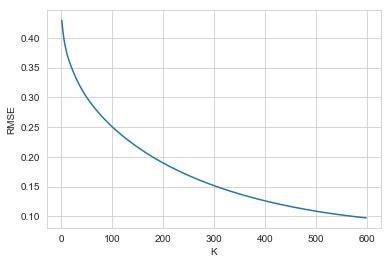

In [48]:
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df_uct[:300])
OPTIMIZED_DIM_SIZE_USER_COURSE_TAG = get_knee_point(scores_df_uct)
print(OPTIMIZED_DIM_SIZE_USER_COURSE_TAG)

In [51]:
grouped_users_courses = user_course_views[['user_handle', 'course_id', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_id'])
meaned_group_users_courses = grouped_users_courses.agg('mean').reset_index()
scores_df_uc = find_optimize_value_of_k_SVD(meaned_group_users_courses, 'user_handle', 'course_id', 'view_time_seconds')

237


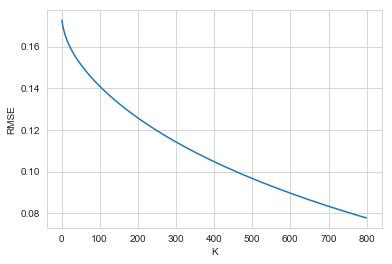

In [55]:
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df_uc)
OPTIMIZED_DIM_SIZE_USER_COURSE = get_knee_point(scores_df_uc)
print(OPTIMIZED_DIM_SIZE_USER_COURSE)

In [56]:
grouped_users_course_level = user_course_views[['user_handle', 'level', 'view_time_seconds']]\
                                .groupby(['user_handle', 'level'])
meaned_group_users_course_level = grouped_users_course_level.agg('mean').reset_index()
scores_df_ucl = find_optimize_value_of_k_SVD(meaned_group_users_course_level, 'user_handle', 'level', 'view_time_seconds')

3


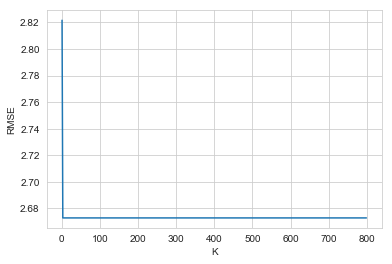

In [58]:
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df_ucl)
OPTIMIZED_DIM_SIZE_USER_COURSE_LEVEL = get_knee_point(scores_df_ucl)
print(OPTIMIZED_DIM_SIZE_USER_COURSE_LEVEL)

#### Model Building :
We are trying to find following similarities-
**<br>- Similarity among users based on their assessments.
<br>- Similarity among users based on their interest tags.
<br>- Similarity among users based on time(in seconds) they spend on each course-tag.
<br>- Similarity among users based on time(in seconds) they spend on each course.
<br>- Similarity among users based on the level of the courses they take and spend time on each of such courses
<br>- Finally, use all the above similarities to calculate one single similarity measure**
<br><br>The optimized values found for each algorithm are as below.
<br>- KNNBaseline Algorithm for all the similarities above.
<br>- Cosine similarity for all the similarities above.
<br>- SVD similarity for all the similarities above. With dimesion magnitude optimized for each of the similarities.
<br>- We can also find pearson similarity but it is time consuming.(Heavy on model training)

In [127]:
TOP_CUTOFF_USERS = 10

# Class for similarity measure.
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

class SimilarityMeasure:
    def __initialize_matrix(self):
        if self.__values_column is None:
            self.__dataframe['temp_val'] = 1
            self.__values_column = 'temp_val'
        self.__scores_matrix = self.__dataframe.pivot(index = self.__index_column, columns= self.__columns_column, 
                                            values = self.__values_column)
        self.__scores_matrix = self.__scores_matrix.fillna(0)
        self.index_values = self.__scores_matrix.index.values
        # we need reindexed to calclulate the cosine similarities
        self.__reindexed_scores_matrix = self.__scores_matrix.copy()
        self.__reindexed_scores_matrix.index = range(0, self.index_values.shape[0])
        self.pearson_similarity_martix = None
        self.cosine_similarities_matrix = None
        self.__sliced = None
        self.__knn_algo = None
    
    def calculate_pearson_similarity(self):
        self.pearson_similarity_martix = self.__scores_matrix.T.corr(method = 'pearson')
        print("Pearson similarity calculated!")
        
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def get_pearson_similar_users(self, user_handle, num_similar_users = TOP_CUTOFF_USERS):
        if not self.isValidUser(user_handle):
            print("Error - User not found!!")
            return None
        if self.pearson_similarity_martix is not None:
            user_handle_scores = self.pearson_similarity_martix[user_handle]
            similar_users = user_handle_scores.sort_values(ascending = False)[1:num_similar_users]
            return similar_users
        else :
            print("Error - Pearson similarity not calculated!!!!")
    
    # Function to calculate cosine similarity.
    def calculate_cosine_similarity(self):
        A_sparse = sparse.csr_matrix(self.__reindexed_scores_matrix)
        self.cosine_similarities_matrix = cosine_similarity(A_sparse, dense_output = False)
        print("Cosine similarity calculated!")
    
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def get_cosine_similar_users(self, user_handle, num_similar_users = TOP_CUTOFF_USERS):
        if not self.isValidUser(user_handle):
            print("Error - User not found!!")
            return None
        if self.cosine_similarities_matrix is not None:
            idx = np.where(self.index_values == user_handle)
            print(idx)
            scores = pd.DataFrame(self.cosine_similarities_matrix[idx].T.toarray(), index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:num_similar_users]
            return similar_users
        else :
            print("Error - Cosine similarity not caclculated!!!!")
        
    def calculate_svd_similarity(self, full_matrix = False, dim_size = 20):
        scores_mean = np.asarray([(np.mean(self.__reindexed_scores_matrix, 1))]).T
        normalised_mat = self.__reindexed_scores_matrix - scores_mean
        A = normalised_mat.T
        # Using svd
        U, S, V = np.linalg.svd(A, full_matrices = full_matrix)
        #Reducing the dimensions
        self.__sliced = V.T[:, :dim_size]
        # special matrix multiplication to get the magnitudes. 
        # element wise multiplication and summation row1 * col1, row2 * col2...so on
        self.__magnitude = np.sqrt(np.einsum('ij, ij -> i', self.__sliced, self.__sliced))
        print("SVD similarity calculated!")

        
    def get_svd_similar_users(self, user_handle, num_similar_users = TOP_CUTOFF_USERS):
        if not self.isValidUser(user_handle):
            print("Error - User not found!!")
            return None
        if self.__sliced is not None:
            index = np.where(self.index_values == user_handle)[0][0] # we need index as int not array
            user_row = self.__sliced[index, :]
            similarity = np.dot(user_row, self.__sliced.T) / (self.__magnitude[index] * self.__magnitude)
            scores = pd.DataFrame(similarity, index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:num_similar_users]
            return similar_users
        else :
            print("Error - SVD Similarity not calculated!!!!")
    
    
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def train_KNN_BaseLine(self):
        reader = Reader(rating_scale=(self.__dataframe[self.__values_column].min(), 
                                      self.__dataframe[self.__values_column].max()))
        data = Dataset.load_from_df(self.__dataframe[[self.__index_column, self.__columns_column, 
                                                      self.__values_column]], reader) 
        sim_options = {'name': 'pearson_baseline'}
        self.__knn_algo = KNNWithMeans(sim_options)
        # Train the algorithm on the trainset, and predict ratings for the testset
        self.__knn_algo.fit(data.build_full_trainset())
    
    def get_KNN_similar_users(self, user_handle, num_similar_users = TOP_CUTOFF_USERS):
        if not self.isValidUser(user_handle):
            print("Error - User not found!!")
            return None
        if self.__knn_algo is not None:
            index = np.where(self.index_values == user_handle)[0][0] # we need index as int not array
            index_neighbor_users = self.__knn_algo.get_neighbors(index, k = num_similar_users)
            
            scores = pd.DataFrame(self.__knn_algo.sim[index].T, index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:num_similar_users]
            return similar_users
        else :
            print("Error - SVD Similarity not calculated!!!!")
    
    def isValidUser(self, user_handle):
        return ((self.index_values == user_handle).sum() > 0)
    
    def __init__(self, parameters):
        self.__dataframe = parameters['dataframe'].copy()
        self.__index_column = parameters['index_column']
        # The column in dataframe which will be used to created columns in matrix
        self.__columns_column = parameters['columns_column']
        if 'values_column' in parameters:
            self.__values_column = parameters['values_column']
        else:
            self.__values_column = None
        self.__initialize_matrix()
    
    class UserNotFound(Exception):
        """Raise this execption when user is not found"""
        pass

In [128]:
user_assessment_similarity_measure = SimilarityMeasure({
                                'dataframe' : user_assessment_scores,
                                'index_column' : 'user_handle', 'columns_column' : 'assessment_tag',
                                'values_column' : 'user_assessment_score'
                                })
user_assessment_similarity_measure.train_KNN_BaseLine()
user_assessment_similarity_measure.calculate_cosine_similarity()
user_assessment_similarity_measure.calculate_svd_similarity(dim_size = OPTIMIZED_DIM_SIZE_USER_ASSESSMENT)
user_assessment_similarity_measure.calculate_pearson_similarity()

Computing the msd similarity matrix...
Done computing similarity matrix.
Cosine similarity calculated!
SVD similarity calculated!
Pearson similarity calculated!


In [90]:
print(user_assessment_similarity_measure.get_cosine_similar_users('8887'))
print(user_assessment_similarity_measure.get_svd_similar_users('8887'))
print(user_assessment_similarity_measure.get_KNN_similar_users('8887'))
print(user_assessment_similarity_measure.get_pearson_similar_users('8887'))

(array([2752], dtype=int64),)
             0
9460  0.841721
8412  0.789517
5236  0.788519
5694  0.766058
1494  0.763504
4048  0.729360
840   0.709927
9177  0.703223
7997  0.696422
             0
5694  0.788812
5236  0.770335
9460  0.764643
840   0.761072
9177  0.749171
7246  0.748146
7997  0.747056
1494  0.745034
8716  0.669206
[435, 1890, 2448, 3072, 50, 52, 1011, 1057, 1741, 1776]
[1.  1.  1.  1.  0.5 0.5 0.5 0.5 0.5 0.5]
        0
988   1.0
2233  1.0
8074  1.0
6395  1.0
9467  0.5
6060  0.5
1095  0.5
1097  0.5
9872  0.5
user_handle
9460    0.834141
5236    0.776508
8412    0.775941
5694    0.752632
1494    0.750021
4048    0.713377
840     0.693611
9177    0.686328
7997    0.683086
Name: 8887, dtype: float64


C:\Python27\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in divide


In [160]:
user_interest_similarity_measure = SimilarityMeasure({
                                'dataframe' : user_interests[['user_handle', 'interest_tag']].drop_duplicates(),
                                'index_column' : 'user_handle', 'columns_column' : 'interest_tag'
                                })
user_interest_similarity_measure.calculate_cosine_similarity()
user_interest_similarity_measure.calculate_svd_similarity(dim_size = OPTIMIZED_DIM_SIZE_USER_INTEREST)
user_interest_similarity_measure.train_KNN_BaseLine()
#user_interest_similarity_measure.calculate_pearson_similarity()

Cosine similarity calculated!
SVD similarity calculated!
Computing the msd similarity matrix...
Done computing similarity matrix.


In [165]:
print(user_interest_similarity_measure.get_cosine_similar_users('8887'))
print(user_interest_similarity_measure.get_svd_similar_users('8887'))
print(user_interest_similarity_measure.get_KNN_similar_users('8887'))
print(user_interest_similarity_measure.get_pearson_similar_users('8887'))

(array([8764], dtype=int64),)
             0
4616  0.928571
1090  0.925820
8595  0.902007
3576  0.897085
2616  0.897085
6701  0.894427
7809  0.887244
6581  0.887244
3327  0.877328
             0
1090  0.792226
7809  0.782404
4616  0.626328
8791  0.623643
9662  0.605272
9188  0.592412
6547  0.586541
9577  0.537429
1302  0.523054
        0
6133  1.0
6131  1.0
6128  1.0
6127  1.0
6126  1.0
6125  1.0
6124  1.0
6123  1.0
6122  1.0
Error - Pearson similarity not calculated!!!!
None


In [166]:
user_courses_merge = pd.merge(left = user_course_views, right = course_tags, on = ['course_id'])
grouped_users_course_tags = user_courses_merge[['user_handle', 'course_tags', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_tags'])
meaned_group_user_courses_tag = grouped_users_course_tags.agg('mean').reset_index()
user_courseview_tag_similarity_measure = SimilarityMeasure({
                                'dataframe' : meaned_group_user_courses_tag[['user_handle', 'course_tags', 
                                                                             'view_time_seconds']],
                                'index_column' : 'user_handle', 'columns_column' : 'course_tags',
                                'values_column' : 'view_time_seconds'
                                })
user_courseview_tag_similarity_measure.calculate_svd_similarity(dim_size = OPTIMIZED_DIM_SIZE_USER_COURSE_TAG)
user_courseview_tag_similarity_measure.calculate_cosine_similarity()
user_courseview_tag_similarity_measure.train_KNN_BaseLine()
#user_courseview_tag_similarity_measure.calculate_pearson_similarity()

SVD similarity calculated!
Cosine similarity calculated!
Computing the msd similarity matrix...
Done computing similarity matrix.


In [65]:
print(user_courseview_tag_similarity_measure.get_cosine_similar_users('8887'))
print(user_courseview_tag_similarity_measure.get_svd_similar_users('8887'))
print(user_courseview_tag_similarity_measure.get_KNN_similar_users('8887'))
print(user_courseview_tag_similarity_measure.get_pearson_similar_users('8887'))

(array([7684], dtype=int64),)
             0
7817  0.436514
5336  0.435969
9275  0.433626
3941  0.429487
9735  0.416445
238   0.415997
4399  0.414570
3301  0.412748
4096  0.408434
             0
913   0.420097
6630  0.410853
3845  0.410175
1242  0.371341
7241  0.365573
9721  0.353756
6162  0.347314
1352  0.339193
108   0.336398
[3749, 4991, 618, 237, 6228, 841, 1834, 6951, 2955, 6581]
[0.99998526 0.99998526 0.99998331 0.99997357 0.99997002 0.99996818
 0.99993255 0.99991995 0.9998912  0.99988222]
             0
4832  0.999985
611   0.999985
1642  0.999983
1240  0.999974
7398  0.999970
1865  0.999968
2879  0.999933
8142  0.999920
4026  0.999891
Error - Pearson similarity not calculated!!!!
None


In [172]:
grouped_users_courses = user_course_views[['user_handle', 'course_id', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_id'])
meaned_group_users_courses = grouped_users_courses.agg('mean').reset_index()
user_courseview_similarity_measure = SimilarityMeasure({
                                'dataframe' : meaned_group_users_courses[['user_handle', 'course_id', 'view_time_seconds']],
                                'index_column' : 'user_handle', 'columns_column' : 'course_id',
                                'values_column' : 'view_time_seconds'
                                })
user_courseview_similarity_measure.calculate_cosine_similarity()
user_courseview_similarity_measure.calculate_svd_similarity(dim_size = OPTIMIZED_DIM_SIZE_USER_COURSE)
user_courseview_similarity_measure.train_KNN_BaseLine()
#user_courseview_similarity_measure.calculate_pearson_similarity()

Cosine similarity calculated!
SVD similarity calculated!
Computing the msd similarity matrix...
Done computing similarity matrix.


In [67]:
print(user_courseview_similarity_measure.get_cosine_similar_users('8887'))
print(user_courseview_similarity_measure.get_svd_similar_users('8887'))
print(user_courseview_similarity_measure.get_KNN_similar_users('8887'))
print(user_courseview_similarity_measure.get_pearson_similar_users('8887'))

(array([7684], dtype=int64),)
             0
7077  0.313326
9714  0.313326
4550  0.313326
9735  0.289132
8423  0.283480
7700  0.283480
6815  0.278046
5255  0.273364
9938  0.256003
             0
9881  0.452828
4240  0.448961
5255  0.448549
9714  0.448456
4550  0.448456
7077  0.448456
6806  0.446283
1395  0.439455
9241  0.432779
[3882, 1339, 2893, 4132, 4923, 5166, 6246, 866, 6560, 4771]
[0.99998918 0.99998469 0.99997462 0.99997157 0.99996896 0.99995466
 0.99985216 0.9998047  0.99978307 0.99949663]
             0
4972  0.999989
2368  0.999985
396   0.999975
5234  0.999972
6043  0.999969
6293  0.999955
7416  0.999852
1891  0.999805
7744  0.999783
Error - Pearson similarity not calculated!!!!
None


In [173]:
grouped_users_course_level = user_course_views[['user_handle', 'level', 'view_time_seconds']]\
                                .groupby(['user_handle', 'level'])
meaned_group_users_course_level = grouped_users_course_level.agg('mean').reset_index()
user_course_level_similarity_measure = SimilarityMeasure({
                                'dataframe' : meaned_group_users_course_level[['user_handle', 'level', 'view_time_seconds']],
                                'index_column' : 'user_handle', 'columns_column' : 'level',
                                'values_column' : 'view_time_seconds'
                                })
user_course_level_similarity_measure.calculate_cosine_similarity()
user_course_level_similarity_measure.calculate_svd_similarity(dim_size = OPTIMIZED_DIM_SIZE_USER_COURSE_LEVEL)
user_course_level_similarity_measure.train_KNN_BaseLine()
#user_course_level_similarity_measure.calculate_pearson_similarity()

Cosine similarity calculated!
SVD similarity calculated!
Computing the msd similarity matrix...
Done computing similarity matrix.


In [69]:
print(user_course_level_similarity_measure.get_cosine_similar_users('8887'))
print(user_course_level_similarity_measure.get_svd_similar_users('8887'))
print(user_course_level_similarity_measure.get_KNN_similar_users('8887'))
print(user_course_level_similarity_measure.get_pearson_similar_users('8887'))

(array([7684], dtype=int64),)
        0
4312  1.0
1463  1.0
7028  1.0
2713  1.0
3157  1.0
9014  1.0
3942  1.0
599   1.0
5077  1.0
             0
9014  0.999996
1664  0.999984
3350  0.999982
4656  0.999957
1286  0.999920
599   0.999916
2798  0.999896
1924  0.999829
3968  0.999822
[4619, 5170, 889, 1646, 3014, 7598, 1307, 1089, 1391, 441]
[0.99999945 0.99999816 0.99999713 0.99999512 0.99998376 0.9999825
 0.99998056 0.99997089 0.99996754 0.99992447]
             0
5726  0.999999
6297  0.999998
1915  0.999997
268   0.999995
4086  0.999984
8801  0.999983
2333  0.999981
2110  0.999971
2424  0.999968
Error - Pearson similarity not calculated!!!!
None


In [245]:
class SimiliarUsers:
    """A warpper for the model that we will pickle and use for prediction"""
    def get_merged_scores(self, cosine_similarity, svd_similarity, pearson_similarity, knn_similarity, score_type, weight):
        svd_similarity = pd.DataFrame(svd_similarity).reset_index()
        svd_similarity.columns = ['index', 'svd_' + score_type]
        cosine_similarity = pd.DataFrame(cosine_similarity).reset_index()
        cosine_similarity.columns = ['index', 'cosine_' + score_type]
        merged = pd.merge(left = svd_similarity, right = cosine_similarity, on = 'index')
        merged['total_'+score_type] = merged['svd_' + score_type] + merged['cosine_' + score_type]
        n_scores = 2
        if pearson_similarity is not None:
            pearson_similarity = pd.DataFrame(pearson_similarity).reset_index()
            pearson_similarity.columns = ['index', 'pearson_' + score_type]
            merged = pd.merge(left = merged, right = pearson_similarity, on = 'index')
            merged['total_'+score_type] = merged['total_'+score_type] + merged['pearson_' + score_type]
            n_scores = n_scores + 1
        merged['weighted_AVG_'+score_type] = (merged['total_'+score_type] * weight) / n_scores
        return merged
    
    def get_assessment_similarity(self, user_handle):
        if user_assessment_similarity_measure.isValidUser(user_handle):
            cosine_similarity = self.user_assessment_similarity_measure.get_cosine_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            svd_similarity = self.user_assessment_similarity_measure.get_svd_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            pearson_similarity = self.user_assessment_similarity_measure.get_pearson_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            knn_similarity = self.user_assessment_similarity_measure.get_KNN_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            return self.get_merged_scores(cosine_similarity, svd_similarity, 
                                          pearson_similarity, knn_similarity, 'assessment', self.score_weights['A'])
        else:
            return None
        
    def get_interest_similarity(self, user_handle):
        if user_interest_similarity_measure.isValidUser(user_handle):
            cosine_similarity = self.user_interest_similarity_measure.get_cosine_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            svd_similarity = self.user_interest_similarity_measure.get_svd_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            pearson_similarity = self.user_interest_similarity_measure.get_pearson_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            knn_similarity = self.user_interest_similarity_measure.get_KNN_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            return self.get_merged_scores(cosine_similarity, svd_similarity, 
                                          pearson_similarity, knn_similarity, 'interest', self.score_weights['I'])
        else :
            return None
        
    def get_course_tag_similarity(self, user_handle): 
        if user_courseview_tag_similarity_measure.isValidUser(user_handle):
            cosine_similarity = self.user_courseview_tag_similarity_measure.get_cosine_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            svd_similarity = self.user_courseview_tag_similarity_measure.get_svd_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            pearson_similarity = self.user_courseview_tag_similarity_measure.get_pearson_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            knn_similarity = self.user_courseview_tag_similarity_measure.get_KNN_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            return self.get_merged_scores(cosine_similarity, svd_similarity, 
                                          pearson_similarity, knn_similarity, 'course_tag', self.score_weights['CVT'])
        else:
            return None
        
    def get_course_view_similarity(self, user_handle): 
        if user_courseview_similarity_measure.isValidUser(user_handle):
            cosine_similarity = self.user_courseview_similarity_measure.get_cosine_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            svd_similarity = self.user_courseview_similarity_measure.get_svd_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            pearson_similarity = self.user_courseview_similarity_measure.get_pearson_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            knn_similarity = self.user_courseview_similarity_measure.get_KNN_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            return self.get_merged_scores(cosine_similarity, svd_similarity, 
                                          pearson_similarity, knn_similarity, 'course_view', self.score_weights['CV'])
        else:
            return None
    def get_course_level_similarity(self, user_handle):
        if user_course_level_similarity_measure.isValidUser(user_handle):
            cosine_similarity = self.user_course_level_similarity_measure.get_cosine_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            svd_similarity = self.user_course_level_similarity_measure.get_svd_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            pearson_similarity = self.user_course_level_similarity_measure.get_pearson_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            knn_similarity = self.user_course_level_similarity_measure.get_KNN_similar_users(user_handle, self.N_USERS_TO_COMPARE)
            return self.get_merged_scores(cosine_similarity, svd_similarity, 
                                          pearson_similarity, knn_similarity, 'course_level', self.score_weights['CL'])
        else:
            return None

    def calculate_total_score(self, merged_similarity):
        total_columns = [s for s in merged_similarity.columns if 'AVG' in s]
        print(self.score_weights)
        merged_similarity['AVG_OF_ALL'] = merged_similarity[total_columns].sum(axis=1) / sum(self.score_weights.values())
        merged_similarity = merged_similarity.sort_values(by=['AVG_OF_ALL'], ascending = False)
        return merged_similarity
    
    def set_score_weights(self, new_weights):
        if new_weights is not None:
            self.score_weights = new_weights
        else:
            print("Invalid weights passed!!!!")
            
    def get_similar_users(self, user_handle):
        #store old weight because the weights dictionary will change if any score not present.
        temp_weights = self.score_weights.copy()
        merged_similarity = None
        
        user_assessment_similarity = self.get_assessment_similarity(user_handle)
        user_interest_similarity = self.get_interest_similarity(user_handle)
        
        if (user_assessment_similarity is not None) and (user_interest_similarity is not None):
            merged_similarity = pd.merge(user_assessment_similarity, user_interest_similarity, on = 'index')
        elif user_assessment_similarity is not None:
            del self.score_weights['I']
            merged_similarity = user_assessment_similarity
        elif user_interest_similarity is not None:
            del self.score_weights['A']
            merged_similarity = user_interest_similarity
            
        user_coursetag_similarity = self.get_course_tag_similarity(user_handle)
        if (user_coursetag_similarity is not None):
            merged_similarity = pd.merge(merged_similarity, user_coursetag_similarity, on = 'index')
        else:
            del self.score_weights['CVT']
            
        user_courseview_similarity = self.get_course_view_similarity(user_handle)
        if (user_courseview_similarity is not None):
            merged_similarity = pd.merge(merged_similarity, user_courseview_similarity, on = 'index')
        else:
            del self.score_weights['CV']
            
        user_courselevel_similarity = self.get_course_level_similarity(user_handle)
        if (user_courselevel_similarity is not None):
            merged_similarity = pd.merge(merged_similarity, user_courselevel_similarity, on = 'index')
        else:
            del self.score_weights['CL']
            
        if merged_similarity is not None:
            merged_similarity = self.calculate_total_score(merged_similarity)
        
        # set the weight back to original
        self.score_weights = temp_weights
        return merged_similarity
    
    def __init__(self, parameters):
        self.user_assessment_similarity_measure = parameters['user_assessment_similarity_measure']
        self.user_interest_similarity_measure = parameters['user_interest_similarity_measure']
        self.user_courseview_tag_similarity_measure = parameters['user_courseview_tag_similarity_measure']
        self.user_courseview_similarity_measure = parameters['user_courseview_similarity_measure']
        self.user_course_level_similarity_measure = parameters['user_course_level_similarity_measure']
        if 'score_weights' in parameters:
            self.score_weights = parameters['score_weights']
        else:
            # By default give equal weight to all the scores
            # A = Assessment, I = User Interest, CVT = Course view tags, CV = Course View, CL = Course Level
            self.score_weights = {'A' : 1, 'I' : 1, 'CVT' : 1, 'CV' : 1, 'CL' : 1}
        self.N_USERS_TO_COMPARE = 10000
        
similarity_measures = {
    'user_assessment_similarity_measure' : user_assessment_similarity_measure,
    'user_interest_similarity_measure' : user_interest_similarity_measure,
    'user_courseview_tag_similarity_measure' : user_courseview_tag_similarity_measure,
    'user_courseview_similarity_measure' : user_courseview_similarity_measure,
    'user_course_level_similarity_measure' : user_course_level_similarity_measure
}
similar_users_model = SimiliarUsers(similarity_measures)
similar_users_df = similar_users_model.get_similar_users('1')
similar_users_model.score_weights

(array([0], dtype=int64),)
Error - Pearson similarity not calculated!!!!
(array([0], dtype=int64),)
Error - Pearson similarity not calculated!!!!
(array([0], dtype=int64),)
Error - Pearson similarity not calculated!!!!
(array([0], dtype=int64),)
Error - Pearson similarity not calculated!!!!
{'I': 1, 'CVT': 1, 'CV': 1, 'CL': 1}


{'A': 1, 'CL': 1, 'CV': 1, 'CVT': 1, 'I': 1}

In [246]:
similarity_measures = {
    'user_assessment_similarity_measure' : user_assessment_similarity_measure,
    'user_interest_similarity_measure' : user_interest_similarity_measure,
    'user_courseview_tag_similarity_measure' : user_courseview_tag_similarity_measure,
    'user_courseview_similarity_measure' : user_courseview_similarity_measure,
    'user_course_level_similarity_measure' : user_course_level_similarity_measure,
    'score_weights' : {'A' : 1, 'I' : 1, 'CVT' : 1, 'CV' : 1, 'CL' : 1}
}
similar_users_model = SimiliarUsers(similarity_measures)
similar_users_model.set_score_weights({'A' : 1, 'I' : 1, 'CVT' : 2, 'CV' : 1, 'CL' : 1})
similar_users_df = similar_users_model.get_similar_users('1')
print(similar_users_df.columns)
similar_users_df

(array([0], dtype=int64),)
Error - Pearson similarity not calculated!!!!
(array([0], dtype=int64),)
Error - Pearson similarity not calculated!!!!
(array([0], dtype=int64),)
Error - Pearson similarity not calculated!!!!
(array([0], dtype=int64),)
Error - Pearson similarity not calculated!!!!
{'I': 1, 'CVT': 2, 'CV': 1, 'CL': 1}
Index([u'index', u'svd_interest', u'cosine_interest', u'total_interest',
       u'weighted_AVG_interest', u'svd_course_tag', u'cosine_course_tag',
       u'total_course_tag', u'weighted_AVG_course_tag', u'svd_course_view',
       u'cosine_course_view', u'total_course_view',
       u'weighted_AVG_course_view', u'svd_course_level',
       u'cosine_course_level', u'total_course_level',
       u'weighted_AVG_course_level', u'AVG_OF_ALL'],
      dtype='object')


,index,svd_interest,cosine_interest,total_interest,weighted_AVG_interest,svd_course_tag,cosine_course_tag,total_course_tag,weighted_AVG_course_tag,svd_course_view,cosine_course_view,total_course_view,weighted_AVG_course_view,svd_course_level,cosine_course_level,total_course_level,weighted_AVG_course_level,AVG_OF_ALL
116,691,0.210547,0.684712,0.895260,0.447630,0.496344,0.714715,1.211060,1.211060,0.625506,0.505936,1.131442,0.565721,0.127815,0.727447,0.855262,0.427631,0.530408
1678,6251,0.052139,0.699234,0.751373,0.375687,0.496344,0.714715,1.211060,1.211060,0.625506,0.505936,1.131442,0.565721,0.127815,0.727447,0.855262,0.427631,0.516020
1835,6147,0.045804,0.591608,0.637412,0.318706,0.496344,0.714715,1.211060,1.211060,0.625506,0.505936,1.131442,0.565721,0.205153,0.727447,0.932600,0.466300,0.512357
1553,7045,0.057309,0.492805,0.550114,0.275057,0.496344,0.714715,1.211060,1.211060,0.625506,0.505936,1.131442,0.565721,0.127815,0.727447,0.855262,0.427631,0.495894
5443,2549,-0.021820,0.507093,0.485272,0.242636,0.496344,0.714715,1.211060,1.211060,0.625506,0.505936,1.131442,0.565721,0.127815,0.727447,0.855262,0.427631,0.489410
2699,8146,0.022043,0.708142,0.730185,0.365092,0.384498,0.650709,1.035206,1.035206,0.378949,0.369292,0.748241,0.374121,0.290758,0.979237,1.269994,0.634997,0.481883
1354,59,0.067087,0.445367,0.512454,0.256227,0.496344,0.714715,1.211060,1.211060,0.625506,0.505936,1.131442,0.565721,-0.004212,0.727447,0.723235,0.361617,0.478925
5350,4111,-0.020120,0.377964,0.357844,0.178922,0.496344,0.714715,1.211060,1.211060,0.625506,0.505936,1.131442,0.565721,0.117322,0.727447,0.844769,0.422384,0.475617
1212,5903,0.075525,0.239046,0.314571,0.157285,0.496344,0.714715,1.211060,1.211060,0.625506,0.505936,1.131442,0.565721,0.136737,0.727447,0.864184,0.432092,0.473232
2321,4569,0.031896,0.358569,0.390464,0.195232,0.496344,0.714715,1.211060,1.211060,0.625506,0.505936,1.131442,0.565721,0.029069,0.727447,0.756516,0.378258,0.470054


In [238]:
score_weights = {'A' : 1, 'I' : 8, 'CVT' : 0, 'CV' : 0, 'CL' : 0}
sum(score_weights.values())

9